In [2]:
#Correlation of fully vaccinated to confirmed cases
import pandas as pd
import os
import matplotlib.pyplot as plt

csv_to_use = os.path.join("Resources","texas_combined_completed_data.csv")

if not os.path.exists(csv_to_use):
    print("File does not exists: ", csv_to_use)
    exit()
    
Covid_Vac_Data = pd.read_csv(csv_to_use)[["Last_Update","Confirmed","People_Fully_Vaccinated"]]
Covid_Vac_Data


,Last_Update,Confirmed,People_Fully_Vaccinated
0,1/20/2021,2157459,179801.0
1,1/21/2021,2185554,203028.0
2,1/22/2021,2208871,205538.0
3,1/23/2021,2227789,230596.0
4,1/24/2021,2242473,251815.0
...,...,...,...
273,10/21/2021,4196761,15283608.0
274,10/22/2021,4202418,15311779.0
275,10/23/2021,4206675,15347006.0
276,10/24/2021,4209200,15358788.0


In [3]:
df_ShiftedData = Covid_Vac_Data.shift(periods=1)[["Confirmed","People_Fully_Vaccinated"]]
df_ShiftedData

,Confirmed,People_Fully_Vaccinated
0,NaN,NaN
1,2157459.0,179801.0
2,2185554.0,203028.0
3,2208871.0,205538.0
4,2227789.0,230596.0
...,...,...
273,4191397.0,15258858.0
274,4196761.0,15283608.0
275,4202418.0,15311779.0
276,4206675.0,15347006.0


In [4]:
df_MergedData = pd.merge(Covid_Vac_Data, df_ShiftedData, left_index=True, right_index=True)
df_MergedData

,Last_Update,Confirmed_x,People_Fully_Vaccinated_x,Confirmed_y,People_Fully_Vaccinated_y
0,1/20/2021,2157459,179801.0,NaN,NaN
1,1/21/2021,2185554,203028.0,2157459.0,179801.0
2,1/22/2021,2208871,205538.0,2185554.0,203028.0
3,1/23/2021,2227789,230596.0,2208871.0,205538.0
4,1/24/2021,2242473,251815.0,2227789.0,230596.0
...,...,...,...,...,...
273,10/21/2021,4196761,15283608.0,4191397.0,15258858.0
274,10/22/2021,4202418,15311779.0,4196761.0,15283608.0
275,10/23/2021,4206675,15347006.0,4202418.0,15311779.0
276,10/24/2021,4209200,15358788.0,4206675.0,15347006.0


In [5]:
df_MergedData["Fully Vaccinated Daily"] = df_MergedData["People_Fully_Vaccinated_x"] - df_MergedData["People_Fully_Vaccinated_y"]
df_MergedData["Confirmed_Daily"] = df_MergedData["Confirmed_x"] - df_MergedData["Confirmed_y"]
df_MergedData["Date"] = pd.to_datetime(df_MergedData["Last_Update"])
df_MergedData

,Last_Update,Confirmed_x,People_Fully_Vaccinated_x,Confirmed_y,People_Fully_Vaccinated_y,Fully Vaccinated Daily,Confirmed_Daily,Date
0,1/20/2021,2157459,179801.0,NaN,NaN,NaN,NaN,2021-01-20
1,1/21/2021,2185554,203028.0,2157459.0,179801.0,23227.0,28095.0,2021-01-21
2,1/22/2021,2208871,205538.0,2185554.0,203028.0,2510.0,23317.0,2021-01-22
3,1/23/2021,2227789,230596.0,2208871.0,205538.0,25058.0,18918.0,2021-01-23
4,1/24/2021,2242473,251815.0,2227789.0,230596.0,21219.0,14684.0,2021-01-24
...,...,...,...,...,...,...,...,...
273,10/21/2021,4196761,15283608.0,4191397.0,15258858.0,24750.0,5364.0,2021-10-21
274,10/22/2021,4202418,15311779.0,4196761.0,15283608.0,28171.0,5657.0,2021-10-22
275,10/23/2021,4206675,15347006.0,4202418.0,15311779.0,35227.0,4257.0,2021-10-23
276,10/24/2021,4209200,15358788.0,4206675.0,15347006.0,11782.0,2525.0,2021-10-24


In [6]:
df_MergedData["Fully Vaccinated Daily"].min()

0.0

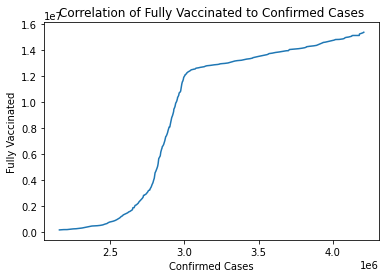

In [10]:
# Plot both on the same chart
x_axis_data = Covid_Vac_Data["Confirmed"]
confirmed = Covid_Vac_Data["People_Fully_Vaccinated"]
#vaccinated = df_MergedData["People_Fully_Vaccinated_x"] 
plt.plot(x_axis_data, confirmed)
#plt.plot(x_axis_data, vaccinated)
plt.title("Correlation of Fully Vaccinated to Confirmed Cases")
plt.ylabel("Fully Vaccinated")
plt.xlabel("Confirmed Cases")
plt.show()

